In [40]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [42]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
df.shape

(891, 12)

In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df.duplicated().sum()

0

In [56]:
df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [58]:
df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [60]:
df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [62]:
df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [66]:
df['Familysize'] = df['SibSp'] + df['Parch'] + 1

In [69]:
df.groupby(['Familysize'], as_index=False)['Survived'].mean()

,Familysize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [71]:
familymap = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df['Familysizegrouped'] = df['Familysize'].map(familymap)

In [73]:
df.groupby(['Familysizegrouped'], as_index=False)['Survived'].mean()

,Familysizegrouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [75]:
df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


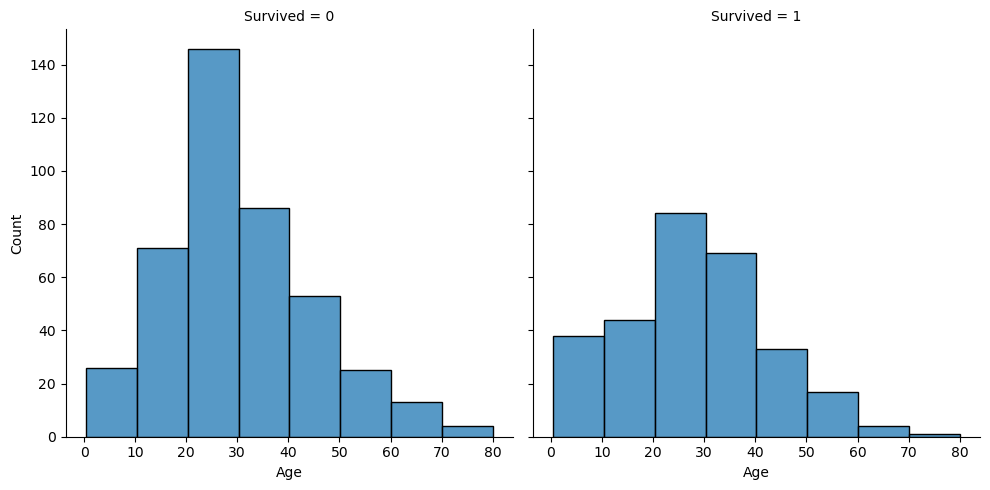

In [77]:
sns.displot(df, x='Age', col='Survived', binwidth=10, height=5)

In [81]:
df['Agecut'] = pd.qcut(df['Age'], 5)

In [83]:
df.groupby(['Agecut'], as_index=False)['Survived'].mean()

C:\Users\Nitin\AppData\Local\Temp\ipykernel_2176\2511103660.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Agecut'], as_index=False)['Survived'].mean()


,Agecut,Survived
0,"(0.419, 19.0]",0.481707
1,"(19.0, 25.0]",0.328467
2,"(25.0, 31.8]",0.393701
3,"(31.8, 41.0]",0.437500
4,"(41.0, 80.0]",0.373239


In [87]:
df.loc[df['Age'] <= 19, 'Age'] = 0
df.loc[(df['Age'] > 19) & (df['Age'] <= 25), 'Age'] = 1
df.loc[(df['Age'] > 25) & (df['Age'] <= 31.8), 'Age'] = 2
df.loc[(df['Age'] > 31.8) & (df['Age'] <= 41), 'Age'] = 3
df.loc[(df['Age'] > 41) & (df['Age'] <= 80), 'Age'] = 4
df.loc[df['Age'] > 80, 'Age']

Series([], Name: Age, dtype: float64)

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Familysizegrouped,Age_Cut,Agecut
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(19.0, 25.0]","(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(31.8, 41.0]","(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(25.0, 31.8]","(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,2,Small,"(31.8, 41.0]","(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,1,Alone,"(31.8, 41.0]","(31.8, 41.0]"


In [93]:
df.drop("Age_Cut",axis=1,inplace=True)

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Familysizegrouped,Agecut
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,2,Small,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,1,Alone,"(31.8, 41.0]"


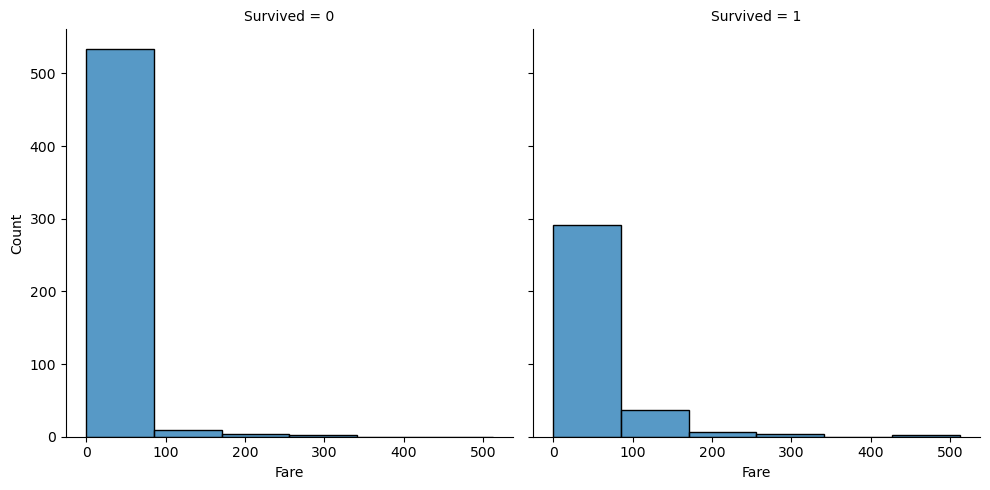

In [97]:
sns.displot(df, x='Fare', col='Survived', binwidth=80, height=5)

In [99]:
df['Farecut'] = pd.qcut(df['Fare'], 5)

In [101]:
df.groupby(['Farecut'], as_index=False)['Survived'].mean()

C:\Users\Nitin\AppData\Local\Temp\ipykernel_2176\3947824687.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Farecut'], as_index=False)['Survived'].mean()


,Farecut,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [103]:
df.loc[df['Fare'] <= 7.854, 'Fare'] = 0
df.loc[(df['Fare'] > 7.854) & (df['Fare'] <= 10.5), 'Fare'] = 1
df.loc[(df['Fare'] > 10.5) & (df['Fare'] <= 21.679), 'Fare'] = 2
df.loc[(df['Fare'] > 21.679) & (df['Fare'] <= 39.688), 'Fare'] = 3
df.loc[(df['Fare'] > 39.688) & (df['Fare'] <= 512.329), 'Fare'] = 4
df.loc[df['Fare'] > 512.329, 'Fare'] 


258    512.3292
679    512.3292
737    512.3292
Name: Fare, dtype: float64

In [105]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [107]:
df['Title'] = df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())

In [109]:
df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [111]:
df['Title'] = df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

In [113]:
df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [115]:
df['Namelength'] = df['Name'].apply(lambda x: len(x))

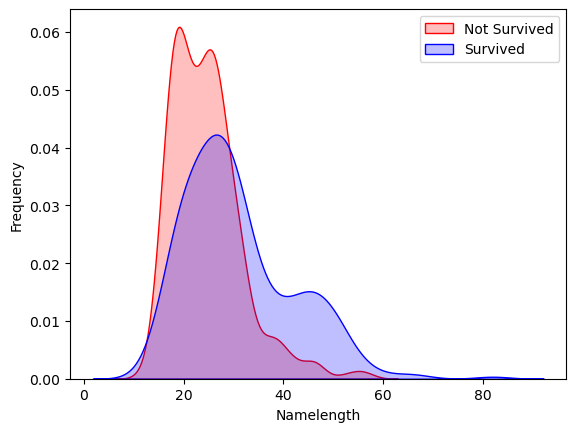

In [117]:
g = sns.kdeplot(df['Namelength'][(df['Survived']==0) & (df['Namelength'].notnull())], color='Red', fill=True)
g = sns.kdeplot(df['Namelength'][(df['Survived']==1) & (df['Namelength'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('Namelength')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [119]:
df['NamelengthGB'] = pd.qcut(df['Namelength'], 3)

In [121]:
df.groupby(['NamelengthGB'], as_index=False)['Survived'].mean()

C:\Users\Nitin\AppData\Local\Temp\ipykernel_2176\2150041053.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['NamelengthGB'], as_index=False)['Survived'].mean()


,NamelengthGB,Survived
0,"(11.999, 22.0]",0.252336
1,"(22.0, 28.0]",0.322581
2,"(28.0, 82.0]",0.587629


In [123]:
df.loc[df['Namelength'] <= 22, 'Namesize'] = 0
df.loc[(df['Namelength'] > 22) & (df['Namelength'] <= 28), 'Namesize'] = 1
df.loc[(df['Namelength'] > 28) & (df['Namelength'] <= 82), 'Namesize'] = 2
df.loc[df['Namelength'] > 82, 'Namesize'] 

Series([], Name: Namesize, dtype: float64)

In [125]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Familysizegrouped,Agecut,Farecut,Title,Namelength,NamelengthGB,Namesize
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(19.0, 25.0]","(-0.001, 7.854]",Mr,23,"(22.0, 28.0]",1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,C85,C,2,Small,"(31.8, 41.0]","(39.688, 512.329]",Mrs,51,"(28.0, 82.0]",2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(25.0, 31.8]","(7.854, 10.5]",Miss,22,"(11.999, 22.0]",0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,C123,S,2,Small,"(31.8, 41.0]","(39.688, 512.329]",Mrs,44,"(28.0, 82.0]",2.0
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,NaN,S,1,Alone,"(31.8, 41.0]","(7.854, 10.5]",Mr,24,"(22.0, 28.0]",1.0


In [127]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [131]:
df['Ticketnumber'] = df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [134]:
df.groupby(['Ticketnumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,Ticketnumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [136]:
df.groupby('Ticketnumber')['Ticketnumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticketnumber, Length: 891, dtype: int64

In [138]:
df['Ticketnumbercounts'] = df.groupby('Ticketnumber')['Ticketnumber'].transform('count')

In [140]:
df.groupby(['Ticketnumbercounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,Ticketnumbercounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [142]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [144]:
df['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [146]:
df['Ticketlocation'] = np.where(df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [148]:
df['Ticketlocation'].value_counts()

Ticketlocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [150]:
df['Ticketlocation'] = df['Ticketlocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

In [152]:
df.groupby(['Ticketlocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,Ticketlocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [154]:
df['Cabin'] = df['Cabin'].fillna('U')
df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in df['Cabin']])

In [156]:
df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [158]:
df['Cabinassigned'] = df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [160]:
df.groupby(['Cabinassigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabinassigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [162]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Agecut,Farecut,Title,Namelength,NamelengthGB,Namesize,Ticketnumber,Ticketnumbercounts,Ticketlocation,Cabinassigned
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,...,"(19.0, 25.0]","(-0.001, 7.854]",Mr,23,"(22.0, 28.0]",1.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,...,"(31.8, 41.0]","(39.688, 512.329]",Mrs,51,"(28.0, 82.0]",2.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,...,"(25.0, 31.8]","(7.854, 10.5]",Miss,22,"(11.999, 22.0]",0.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,...,"(31.8, 41.0]","(39.688, 512.329]",Mrs,44,"(28.0, 82.0]",2.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,...,"(31.8, 41.0]","(7.854, 10.5]",Mr,24,"(22.0, 28.0]",1.0,373450,1,Blank,0


In [164]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\Nitin\AppData\Local\Temp\ipykernel_2176\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [174]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [176]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [178]:
odecols = ['Familysizegrouped']
ohecols = ['Sex', 'Embarked']

In [180]:
correlationmatrix = df.corr(numeric_only=True)

<Axes: >

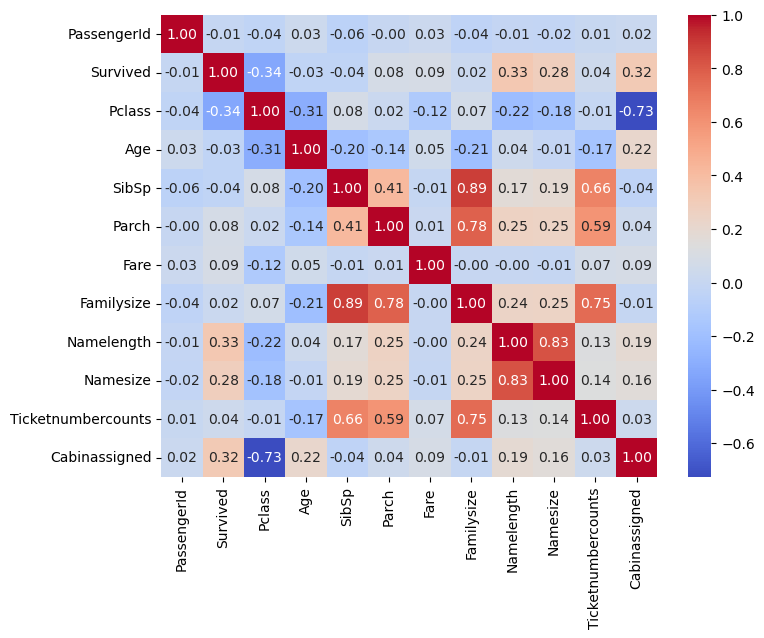

In [182]:
plt.figure(figsize=(8, 6))  
sns.heatmap(correlationmatrix, annot=True, cmap='coolwarm', fmt=".2f")

In [184]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Agecut,Farecut,Title,Namelength,NamelengthGB,Namesize,Ticketnumber,Ticketnumbercounts,Ticketlocation,Cabinassigned
0,1,0,3,"Braund, Mr. Owen Harris",male,1.000000,1,0,A/5 21171,0.0,...,"(19.0, 25.0]","(-0.001, 7.854]",Mr,23,"(22.0, 28.0]",1.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.000000,1,0,PC 17599,4.0,...,"(31.8, 41.0]","(39.688, 512.329]",Mrs,51,"(28.0, 82.0]",2.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.000000,0,0,STON/O2. 3101282,1.0,...,"(25.0, 31.8]","(7.854, 10.5]",Miss,22,"(11.999, 22.0]",0.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.000000,1,0,113803,4.0,...,"(31.8, 41.0]","(39.688, 512.329]",Mrs,44,"(28.0, 82.0]",2.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,3.000000,0,0,373450,1.0,...,"(31.8, 41.0]","(7.854, 10.5]",Mr,24,"(22.0, 28.0]",1.0,373450,1,Blank,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2.000000,0,0,211536,2.0,...,"(25.0, 31.8]","(10.5, 21.679]",Rev,21,"(11.999, 22.0]",0.0,211536,1,Blank,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.000000,0,0,112053,3.0,...,"(0.419, 19.0]","(21.679, 39.688]",Miss,28,"(22.0, 28.0]",1.0,112053,1,Blank,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.948179,1,2,W./C. 6607,3.0,...,NaN,"(21.679, 39.688]",Miss,40,"(28.0, 82.0]",2.0,6607,2,W/C,0
889,890,1,1,"Behr, Mr. Karl Howell",male,2.000000,0,0,111369,3.0,...,"(25.0, 31.8]","(21.679, 39.688]",Mr,21,"(11.999, 22.0]",0.0,111369,1,Blank,1


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 891 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  Familysize          891 non-null    int64   
 13  Familysizegrouped   891 non-null    object  
 14  Agecut              714 non-null    category
 15  Farecut             891 non-null    cate